In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r"C:\Users\vedan\Downloads\train (3).csv")
test = pd.read_csv(r"C:\Users\vedan\Downloads\test (2).csv")
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
572,0,3,Mr. George Patchett,male,19.0,0,0,14.5000
573,1,2,Miss. Ethel Garside,female,34.0,0,0,13.0000
574,1,1,Mrs. William Baird (Alice Munger) Silvey,female,39.0,1,0,55.9000
575,0,3,Mrs. Joseph (Maria Elias) Caram,female,18.0,1,0,14.4583


In [3]:
data['Sex']=data['Sex'].astype('category')
data['Sex']=data['Sex'].cat.codes
test['Sex']=test['Sex'].astype('category')
test['Sex']=test['Sex'].cat.codes
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
572,0,3,Mr. George Patchett,1,19.0,0,0,14.5000
573,1,2,Miss. Ethel Garside,0,34.0,0,0,13.0000
574,1,1,Mrs. William Baird (Alice Munger) Silvey,0,39.0,1,0,55.9000
575,0,3,Mrs. Joseph (Maria Elias) Caram,0,18.0,1,0,14.4583


In [4]:
x=data.drop(columns = 'Survived').drop(columns='Name')
x_test=test.drop(columns = 'Survived').drop(columns='Name')
y=data["Survived"]
y_test=test["Survived"]

x=x.values
y=y.values
x_test=x_test.values
y_test=y_test.values

In [5]:
x=x.T
y=y.reshape(1, x.shape[1])
x_test=x_test.T
y_test=y_test.reshape(1,x_test.shape[1])

In [6]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

def model (X, Y, rate, iters):
    m = X.shape[1]
    n = X.shape[0]
    w = np.zeros((n,1))
    B = 0
    cost_lst = []
    
    for i in range(iters):
        Z = np.dot(w.T , X) + B
        A = sigmoid(Z)
        cost = - (1 / m) * np.sum( Y * np.log(A) + (1 - Y) * np.log(1 - A) )
        dw = (1 / m) * np.dot( (A - Y) , X.T )
        dB = (1 / m) * np.sum( A - Y )
        w = w - (rate*dw.T)
        B = B - (rate*dB)
        cost_lst.append(cost)

        if(i%(iters/10)==0):
            print(cost)
        
    return w, B, cost_lst

0.6931471805599453
0.4684388922354541
0.4602324954850389
0.458399506941659
0.4579501631714987
0.45783473331072255
0.4578043700727107
0.4577962857077803
0.45779411970769074
0.45779353750371854


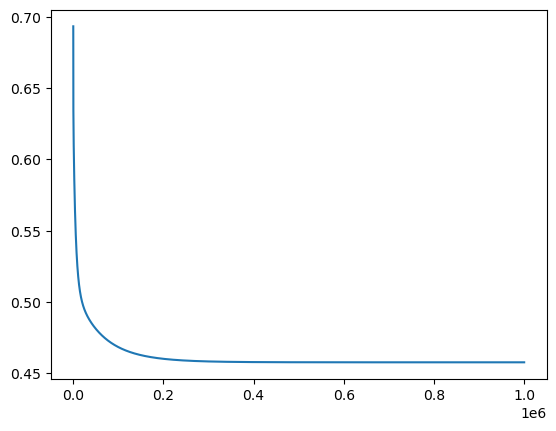

In [13]:
iterations = 1000000
rate = 0.002
W, B , cost_lst = model(x,y, rate, iterations)
plt.plot(np.arange(iterations),cost_lst)

In [14]:
def accuracy(x,y,w,b):

    Z = np.dot(w.T, x) + b
    A = sigmoid ( Z )

    A = A>0.5
    A = np.array(A,dtype='int64')

    acc = (1-np.sum(np.absolute(A-y))/y.shape[1])*100

    print("Accuracy of model : ", acc, "%")

In [15]:
accuracy(x_test,y_test,W,B)

Accuracy of model :  81.29032258064515 %


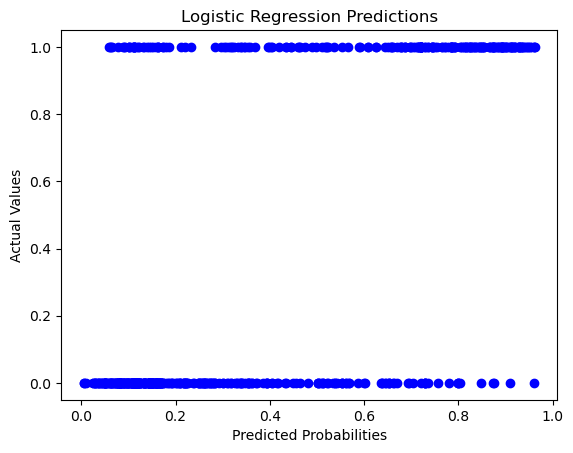

In [16]:
predicted_prob = sigmoid(np.dot(x.T, W)+B)
plt.scatter(predicted_prob, y, color="blue")
plt.xlabel("Predicted Probabilities")
plt.ylabel("Actual Values")
plt.title("Logistic Regression Predictions")
plt.show()